<a href="https://colab.research.google.com/github/kallepalomaki/cyber-ml/blob/main/cyber_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://zenodo.org/record/6463389/files/ALLFLOWMETER_HIKARI2021.csv.zip"
!unzip ALLFLOWMETER_HIKARI2021.csv.zip

--2022-12-09 14:25:59--  https://zenodo.org/record/6463389/files/ALLFLOWMETER_HIKARI2021.csv.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68403081 (65M) [application/octet-stream]
Saving to: ‘ALLFLOWMETER_HIKARI2021.csv.zip.1’

ALLFLOWMETER_HIKARI 100%[===================>]  65.23M   303KB/s    in 3m 36s  

2022-12-09 14:29:38 (309 KB/s) - ‘ALLFLOWMETER_HIKARI2021.csv.zip.1’ saved [68403081/68403081]

Archive:  ALLFLOWMETER_HIKARI2021.csv.zip
replace ALLFLOWMETER_HIKARI2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ALLFLOWMETER_HIKARI2021.csv  


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input, LSTM
from keras.optimizers import Adam, SGD
from datetime import datetime


In [3]:
#!unzip ALLFLOWMETER_HIKARI2021.csv.zip.1
df=pd.read_csv('ALLFLOWMETER_HIKARI2021.csv')


In [4]:
df.shape

(555278, 88)

In [5]:
targets=df['Label'].values
inputs=df.drop(['uid', 'originp', 'originh', 'responh', 'responp', 'traffic_category','Label'],axis=1)

#from sklearn.datasets import load_breast_cancer

# load the data
#data = load_breast_cancer()

#inputs=data.data
#targets=data.target

In [9]:
scaler=StandardScaler()
scaler.fit(inputs)
inputs=scaler.transform(inputs)

In [10]:
inputs=inputs[:,2:]
inputs.shape

(555278, 79)

In [11]:
input_means=np.mean(inputs, axis=0)
input_std=np.std(inputs,axis=0)

1.2605758552224774e-17
-0.2153005507797462


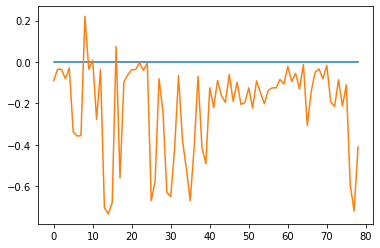

In [12]:
input_median=np.median(inputs, axis=0)
import matplotlib.pyplot as plt
plt.plot(input_means)
plt.plot(input_median)
print(np.mean(input_means))
print(np.mean(input_median))

In [13]:
print(np.argmin(input_median))
print(np.min(input_median))
print(input_median[77], np.median(inputs[:,77]), np.mean(inputs[:,77]))
#plt.plot(inputs[:,77])

14
-0.7340426741704812
-0.7204803747657283 -0.7204803747657283 2.948235772336147e-17


In [14]:
inputs, targets=shuffle(inputs, targets)
train_len=int(len(targets)*0.8)

In [15]:
D=inputs.shape[1]


In [16]:
train_inputs=inputs[:train_len].astype(np.float32).reshape(-1,D)
test_inputs=inputs[train_len:].astype(np.float32).reshape(-1,D)

#train_targets=torch.from_numpy(targets[:train_len])
#test_targets=torch.from_numpy(targets[train_len:])

In [17]:
train_targets=targets[:train_len].astype(np.float32).reshape(-1,1)
test_targets=targets[train_len:].astype(np.float32).reshape(-1,1)

In [18]:
print(train_targets.shape)
print(train_inputs.shape)
D

(444222, 1)
(444222, 79)


79

In [44]:

# create an LSTM network with a single LSTM
input_ = Input(shape=(D,))
layer1 = Dense(100, activation="relu", name="layer1")
layer2 = Dense(100, activation="relu", name="layer2")
layer_out = Dense(1, name="layer_out")

x=layer1(input_)
x=layer2(x)
output=layer_out(x)

model = Model(input_, output)
model.compile(
  #loss='categorical_crossentropy',
  loss="binary_crossentropy",
  # optimizer='rmsprop',
  optimizer=Adam(lr=0.0001),
  # optimizer=SGD(lr=0.01, momentum=0.9),
  metrics=['accuracy']
)

epochs=10
batch_size=512
validation_split=0.2
#print('Training model...')
r = model.fit(
  train_inputs,
  train_targets,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.2,
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
695/695 [==============================] - 11s 14ms/step - loss: 0.2969 - accuracy: 0.9224 - val_loss: 0.2199 - val_accuracy: 0.9305
Epoch 2/10
695/695 [==============================] - 4s 5ms/step - loss: 0.1901 - accuracy: 0.9290 - val_loss: 0.1461 - val_accuracy: 0.9287
Epoch 3/10
695/695 [==============================] - 4s 6ms/step - loss: 0.1405 - accuracy: 0.9315 - val_loss: 0.1413 - val_accuracy: 0.9296
Epoch 4/10
695/695 [==============================] - 6s 8ms/step - loss: 0.1651 - accuracy: 0.9311 - val_loss: 0.1623 - val_accuracy: 0.9294
Epoch 5/10
695/695 [==============================] - 5s 7ms/step - loss: 0.1640 - accuracy: 0.9313 - val_loss: 0.1613 - val_accuracy: 0.9295
Epoch 6/10
695/695 [==============================] - 4s 6ms/step - loss: 0.1632 - accuracy: 0.9315 - val_loss: 0.1605 - val_accuracy: 0.9295
Epoch 7/10
695/695 [==============================] - 6s 8ms/step - loss: 0.1626 - accuracy: 0.9315 - val_loss: 0.1594 - val_accuracy: 0.9307
Epoc

In [40]:
predictions=model.predict(test_inputs)


3471/3471 [==============================] - 9s 3ms/step


In [41]:
predictions.shape

(111056, 1)

In [42]:
predictions=predictions>0.5
test_targets=test_targets>0

In [43]:
np.mean(predictions==test_targets)

0.9318271862843971